# 1-Problématique 

Une entreprise souhaite regrouper ses clients en segments homogènes pour personnaliser ses offres.

# 2-Collecte des données

## 2.1-Importation des Packages 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi

## 2.2-Imporation de la Base de Données

In [11]:
# Charger la base de données
df = pd.read_csv('Mall_Customers.csv', index_col = "CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 2.3-Description de la Base de Données

Cette base de données contient des informations sur les dépenses des clients ainsi que leurs revenues annuels.

Description des variables:

- **CustomerID** : Identifiant du client.
- **Gender** : Sexe du client.
- **Age** : Age du client.
- **Annual Income** : Revenu annuel.
- **Spending Score** : Score de dépense.

## 2.4-Vérification de la qualité des données

In [17]:
# Détail de la base de données
def get_df_info(df):
    print("\n\033[1mTaille de la base de données:\033[0m ", df.shape)
    print("\n\033[1mVariables:\033[0m ", df.columns.to_list())
    print("\n\033[1mType de variables:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformations sur la base de données:\033[0m")
    df.info()
    
    print("\n\033[1mNombre d'unique valeur par colonne:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNombre de valeur nulle par colonne:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("Pas de valeurs nulles.")
    
    print("\n\033[1mNombre de doublons:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mStatistiques descriptives de la base de données:\033[0m\n",)
    return df.describe(include="all").transpose()

# Call the function
get_df_info(df)


Taille de la base de données:  (200, 4)

Variables:  ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Type de variables:
 Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Informations sur la base de données:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB

Nombre d'unique valeur par colonne:
Gender: 2
Age: 51
Annual Income (k$): 64
Spending Score (1-100): 84

Nombre de valeur nulle par colonne:
Pas de valeurs nulles.

Nombre de doublons:  0

Statistiques descriptive

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


# 3-Analyse Exploratoire des Données

## 3.1-Analyse Univariée

Age


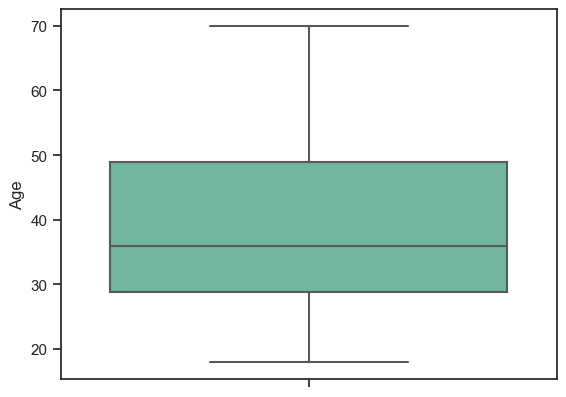

Annual Income (k$)


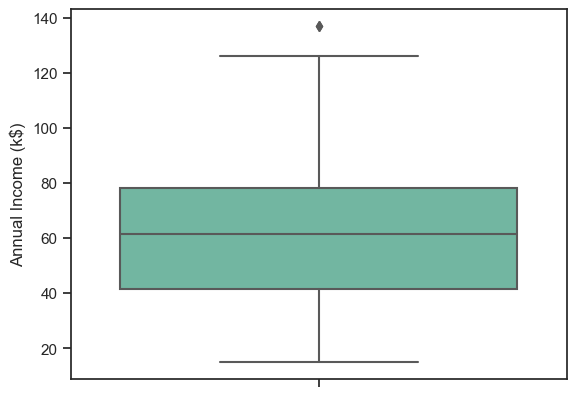

Spending Score (1-100)


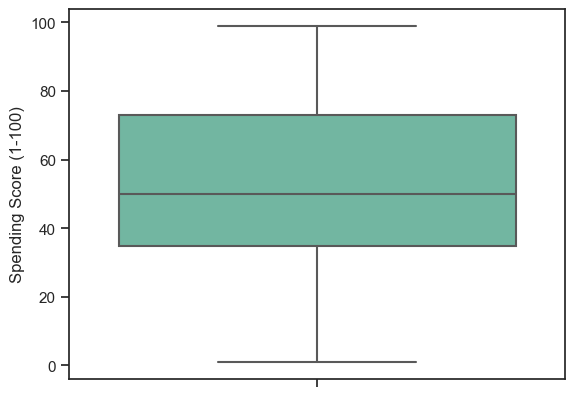

In [20]:
# Analyse descriptive des variables 
quant_vars = df.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, palette="Set2")
    plt.show()

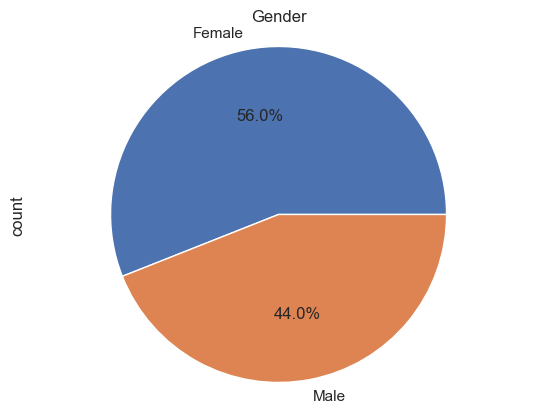

In [24]:
cat_vars = df.select_dtypes(include=['object'])
# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

### Analyse de la normalité des variables quantitatives

C:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


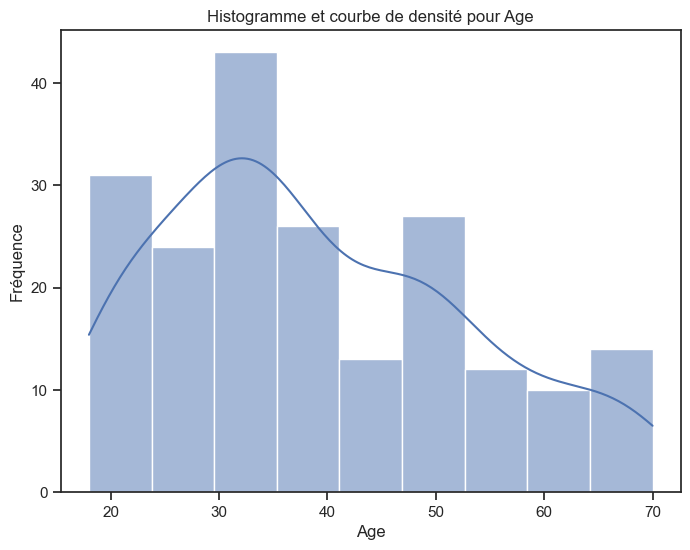

C:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


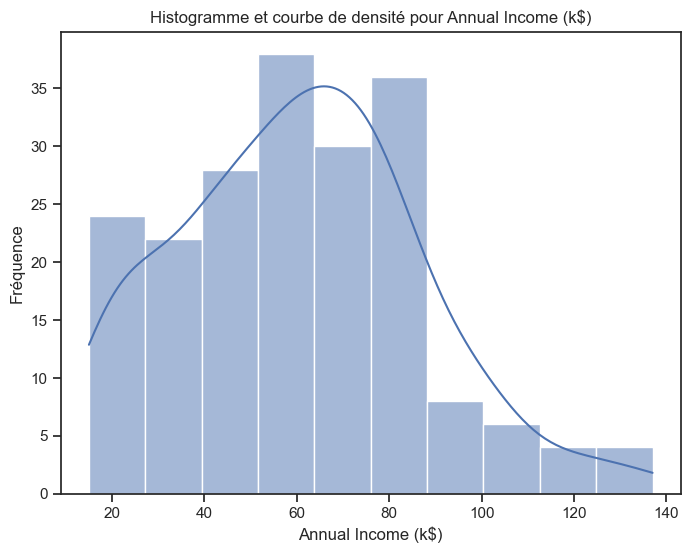

C:\Users\FILS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


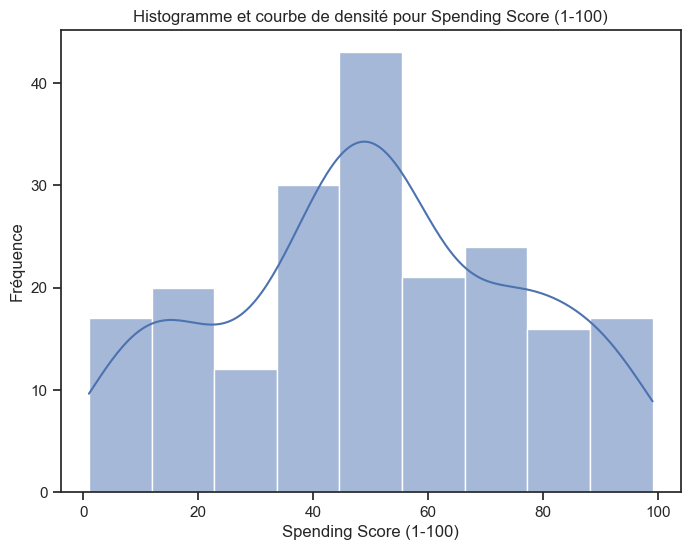

P-valeur de la normalité (Shapiro-Wilk) pour Age: 2.7109526854474097e-06
P-valeur de la normalité (Shapiro-Wilk) pour Annual Income (k$): 0.003537340322509408
P-valeur de la normalité (Shapiro-Wilk) pour Spending Score (1-100): 0.00024227304675150663


In [31]:
from scipy.stats import shapiro, pearsonr, spearmanr
# Analyse graphique de la normalité des deux variables
for var in quant_vars :
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()
# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in quant_vars:
    _, p_value = shapiro(df[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)

## 3.2-Analyse bivariée

### Matrice de correlation

In [34]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Afficher le résultat
correlation_spearman

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.019767,-0.34494
Annual Income (k$),0.019767,1.000000,0.00784
Spending Score (1-100),-0.344940,0.007840,1.00000


### Analyse de la relation entre la variable "Gender" et les autres variables quantitatives

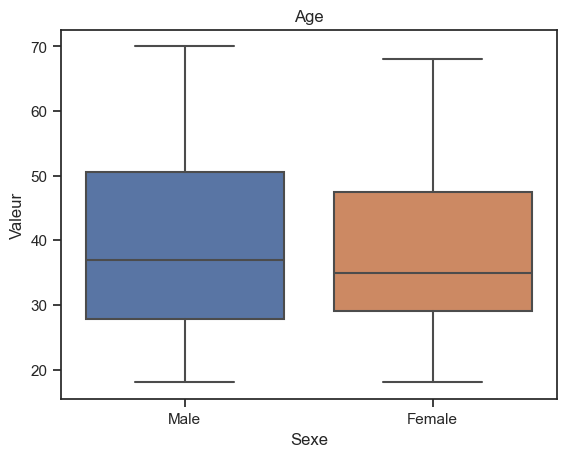

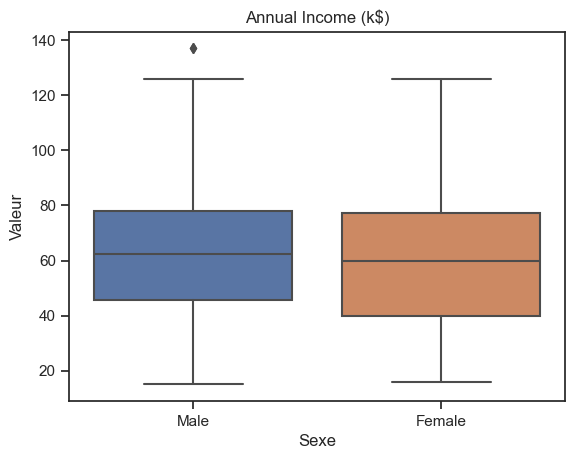

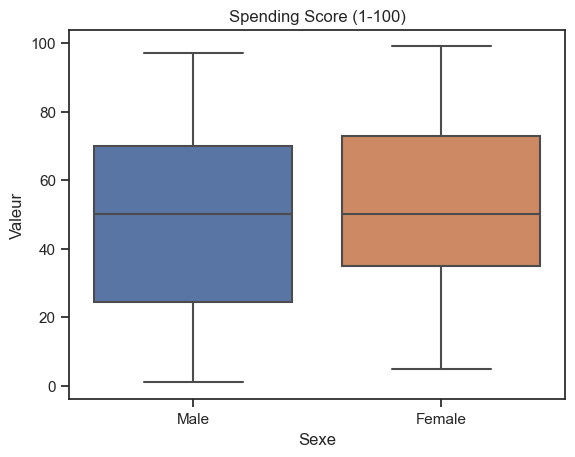

In [39]:
# Générer un box plot pour chaque variable numérique
quant_vars = df.select_dtypes(include=['float64', 'int64'])
for var in quant_vars:
    sns.boxplot(x='Gender', y=var, data=df)
    plt.title(var)
    plt.xlabel('Sexe')
    plt.ylabel('Valeur')
    plt.show()

# 4-Determination des Clusters avec les K-Means

In [42]:
 # Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

In [44]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_normalized)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_normalized, kmeanModel.labels_))

C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

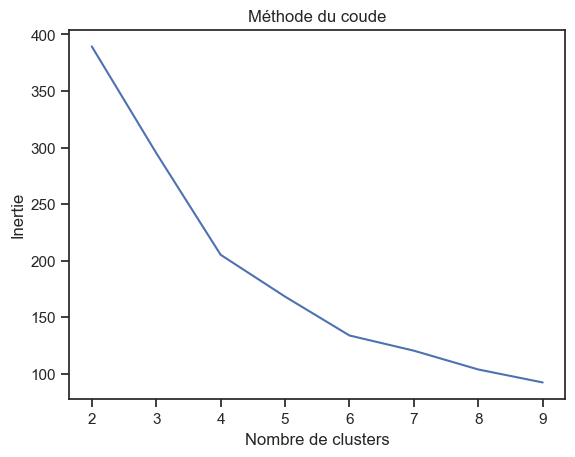

In [46]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

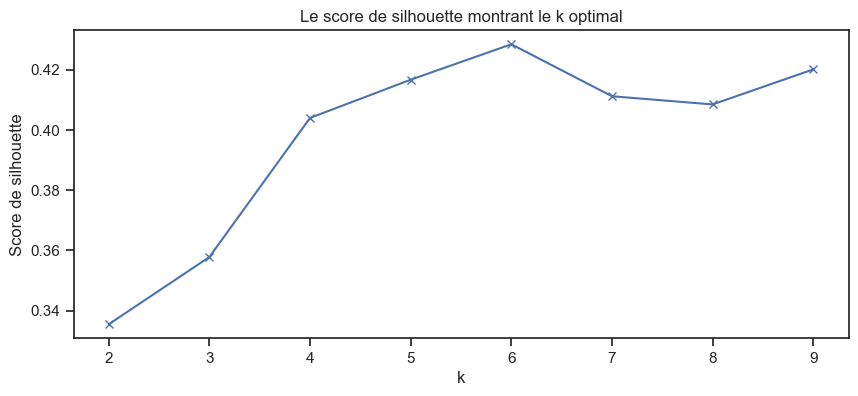

In [48]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [50]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)

C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FILS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [52]:
# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = kmeans.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2
...,...,...,...,...,...
196,Female,35,120,79,1
197,Female,45,126,28,0
198,Male,32,126,74,1


In [54]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = df.groupby('cluster_label')[df_numeric.columns].mean()
cluster_stats


,Age,Annual Income (k$),Spending Score (1-100)
cluster_label,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


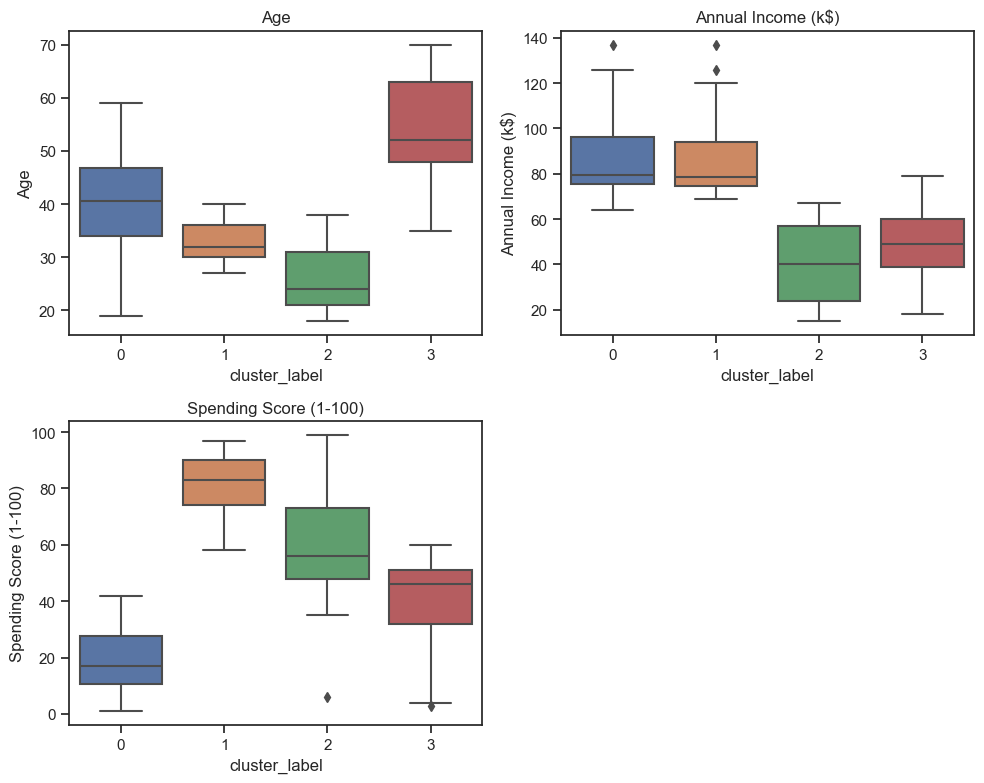

In [56]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) # 

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()

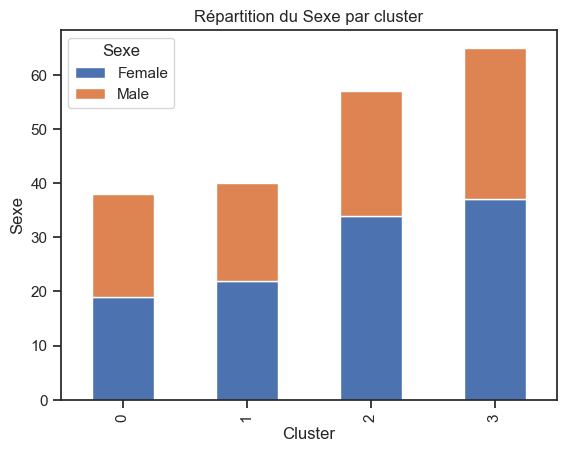

In [58]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(df['cluster_label'], df['Gender'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Sexe')
plt.title('Répartition du Sexe par cluster')

# Afficher la légende
plt.legend(title='Sexe')

# Afficher le graphique
plt.show()

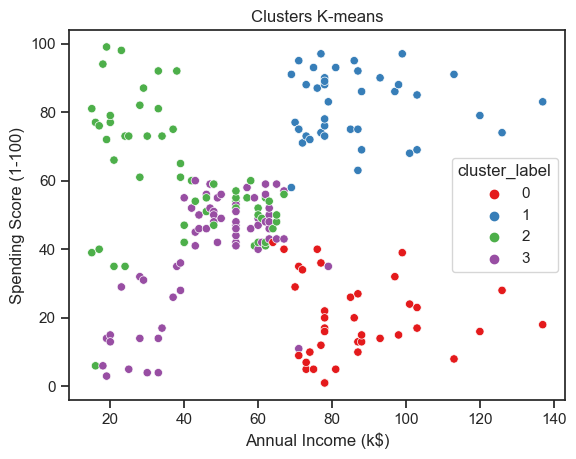

In [60]:
# Visualisation des groupes
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means")
plt.show()